In [2]:
# Tentar fazer previsão de vazão usando a lib Prophet
# seguindo o tutorial disponibilizado no próprio site da lib
# <https://facebook.github.io/prophet/docs/quick_start.html#python-api>

import pandas as pd, matplotlib.pyplot as plt
from prophet import Prophet

plt.style.use('seaborn-whitegrid')

C:\Users\welson\AppData\Local\Temp\ipykernel_11488\4174388723.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
# Ler o arquivo XLSX com dados de vazão do rio a ser trabalhado.

fn = "dados.xlsx"
df = pd.read_excel(fn)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'dados.xlsx'

In [19]:
m = Prophet()
m.fit(df)

17:25:51 - cmdstanpy - INFO - Chain [1] start processing
17:25:56 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
7696,2022-01-27
7697,2022-01-28
7698,2022-01-29
7699,2022-01-30
7700,2022-01-31


In [21]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7696,2022-01-27,32.137411,13.174930,49.979135
7697,2022-01-28,31.852053,13.406596,49.208332
7698,2022-01-29,31.642244,14.586819,50.369486
7699,2022-01-30,31.452556,13.000961,47.677330
7700,2022-01-31,31.418904,13.881101,49.754744


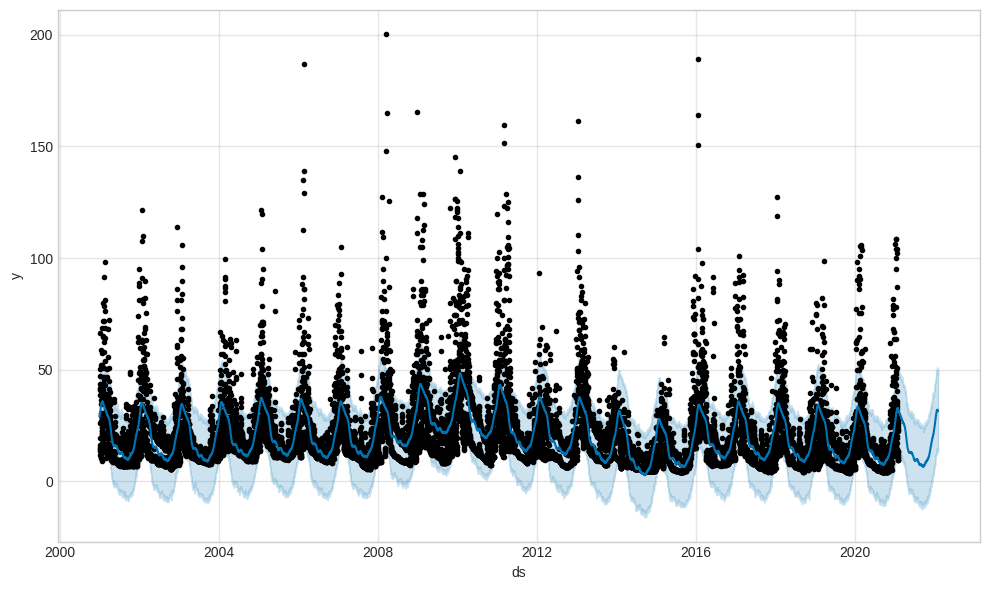

In [22]:
fig1 = m.plot(forecast)

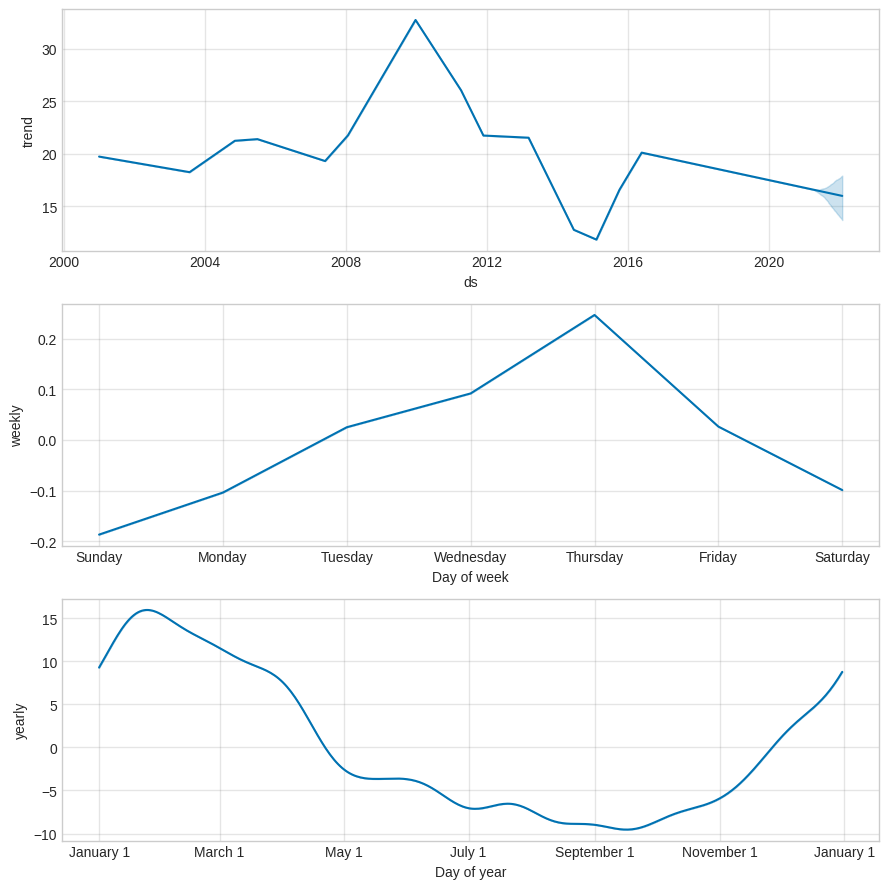

In [23]:
fig2 = m.plot_components(forecast)


In [24]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)